### Health insurance marketing campaign, let's try to predict whether a given customer will purchase the insurance or not.

#### Classification Task

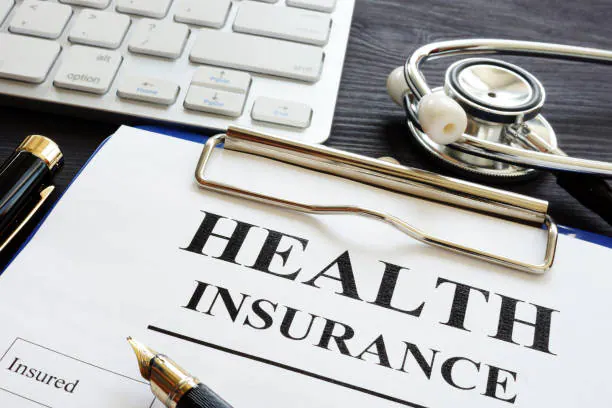

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv("train.csv")

## Basic Checks

In [3]:
# First five rows
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
# Last five rows
data.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [5]:
# Shape of data
data.shape

(50882, 14)

* Dataset contains 14 features with 50882 observations.

In [6]:
# Columns in data
data.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [8]:
# Statistics of data
data.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [9]:
# Statistics of data for categorical data
data.describe(include="O")

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


In [10]:
#Check the number of unique value from all of the object datatype
data.select_dtypes(include='object').nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [11]:
# Remove unnecessary column
data.drop(columns=['ID','City_Code','Region_Code'],inplace=True)
data.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


## Exploratory Data Analysis

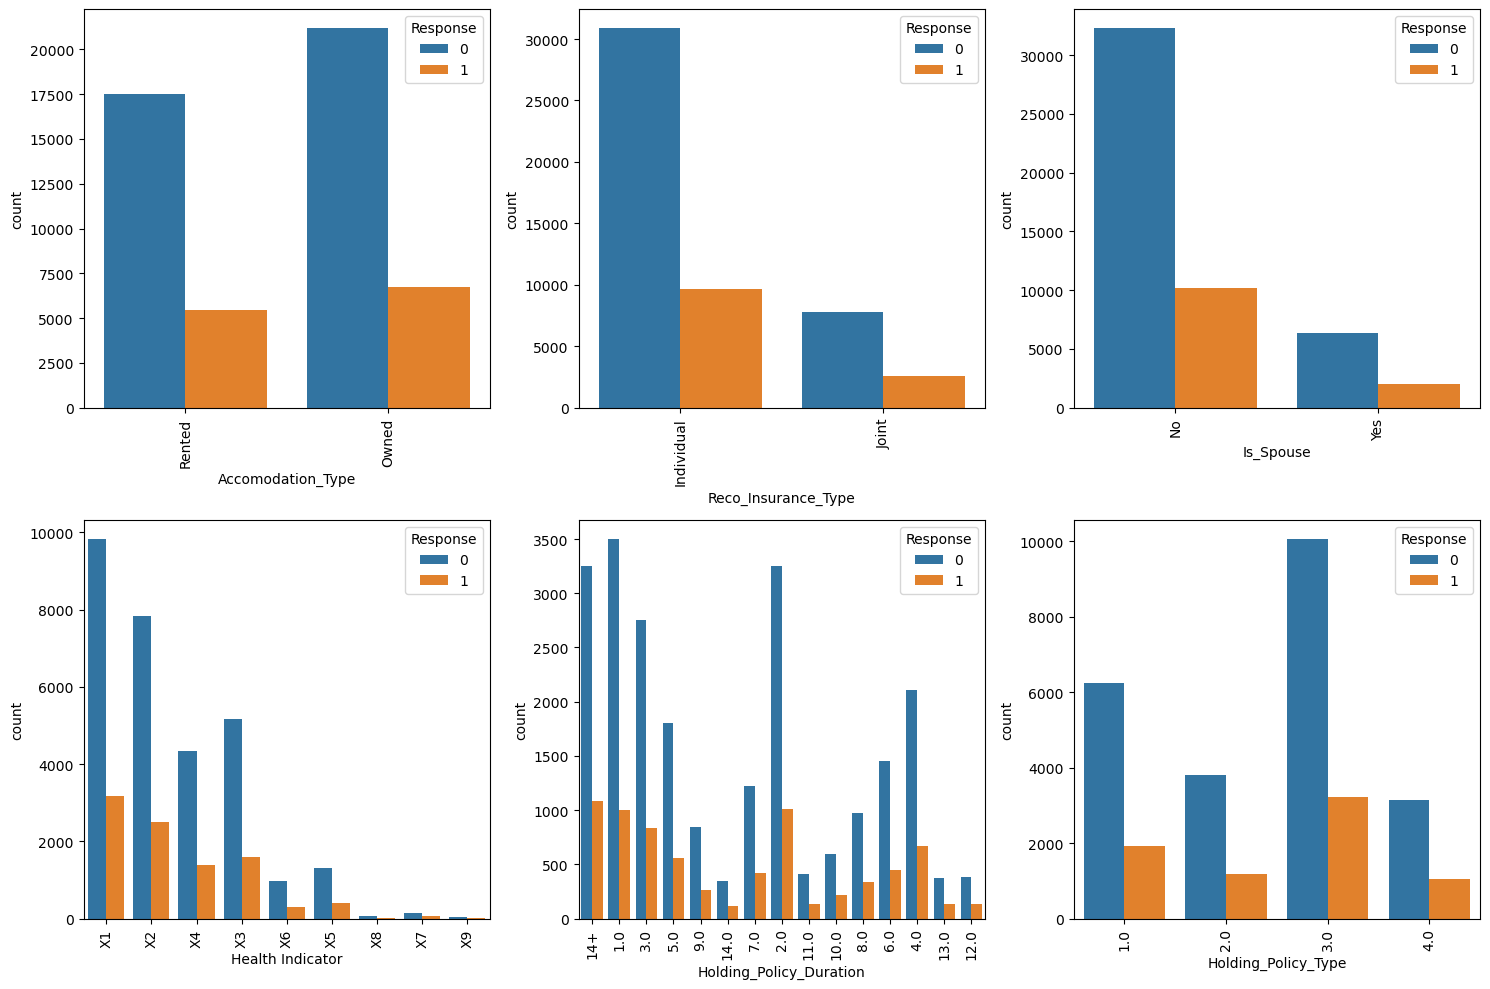

In [12]:
# list of categorical variables to plot
cat_vars = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 
            'Health Indicator', 'Holding_Policy_Duration',
            'Holding_Policy_Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Response', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

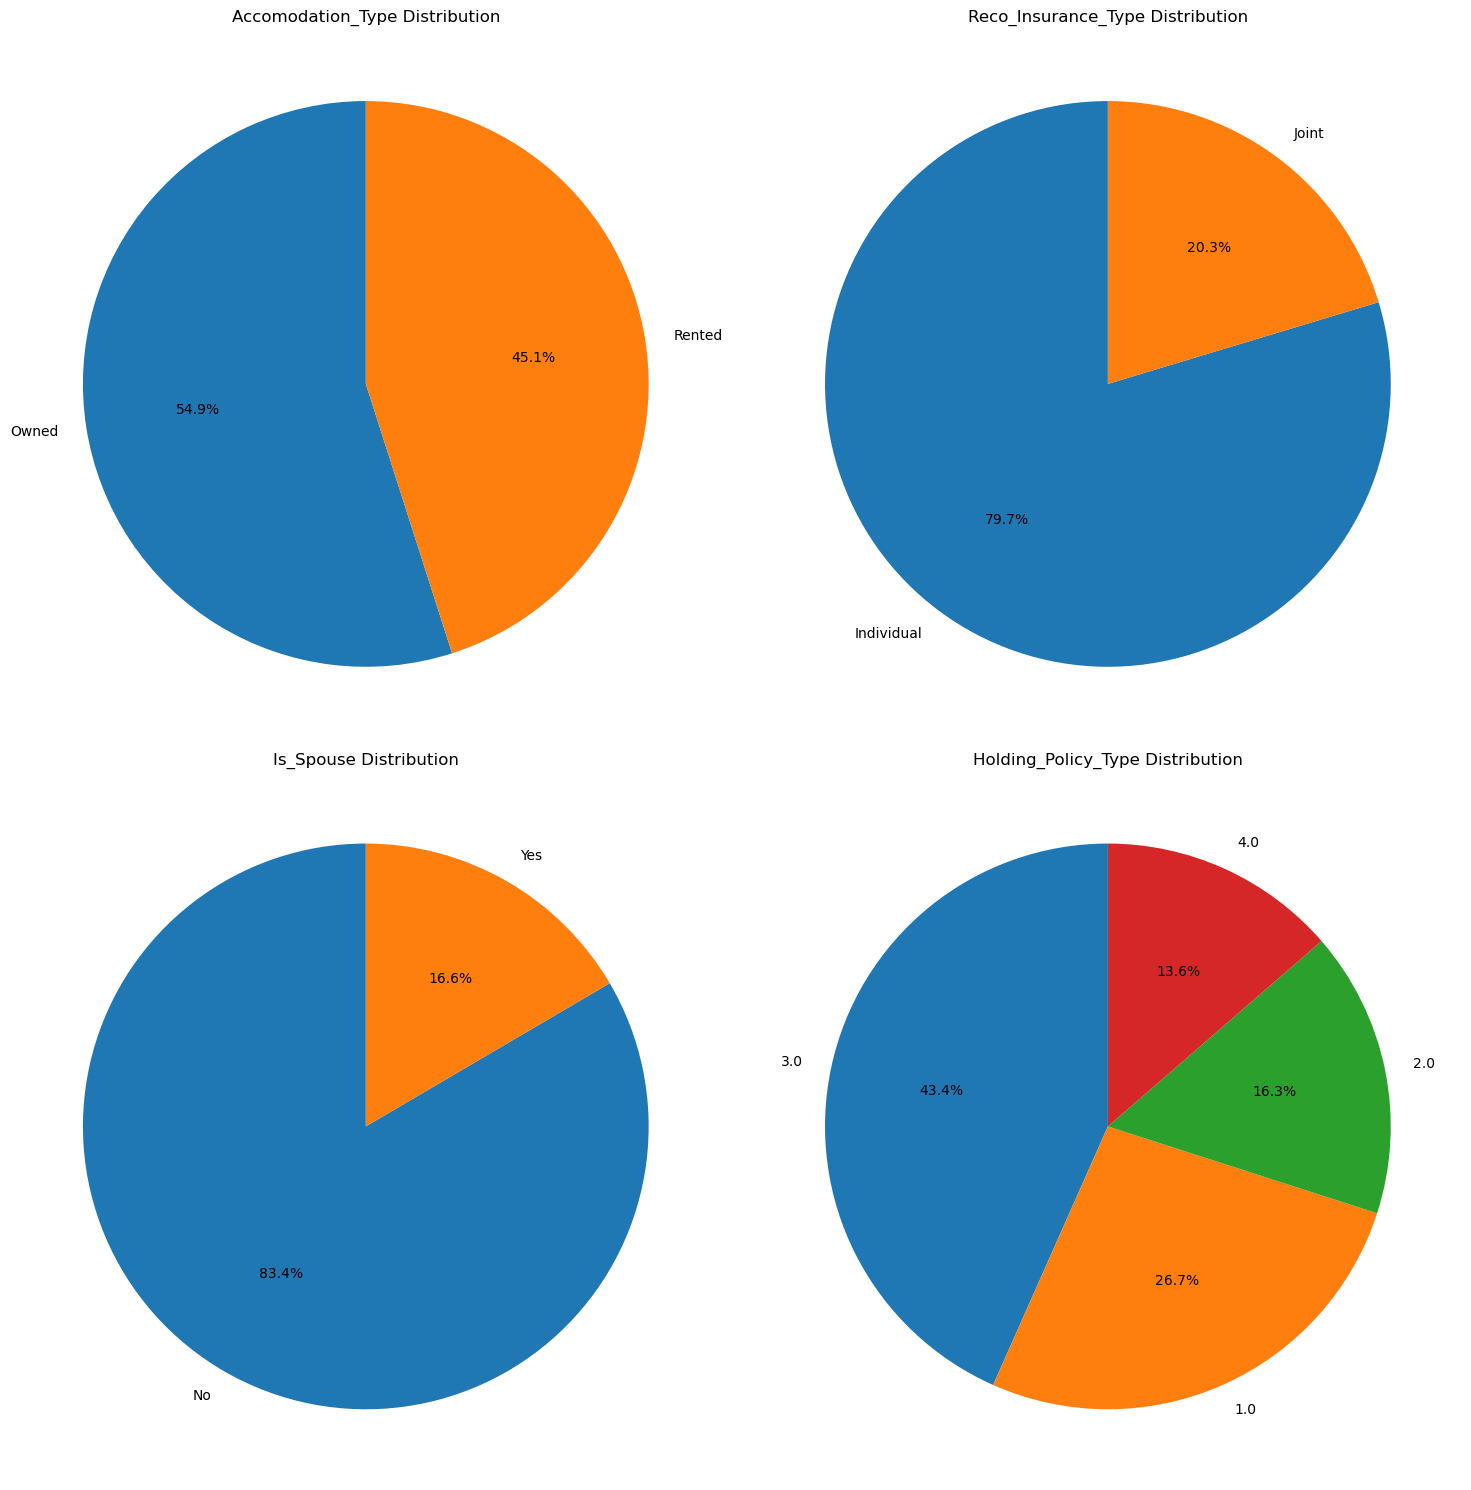

In [13]:
cat_vars = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Holding_Policy_Type']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = data[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

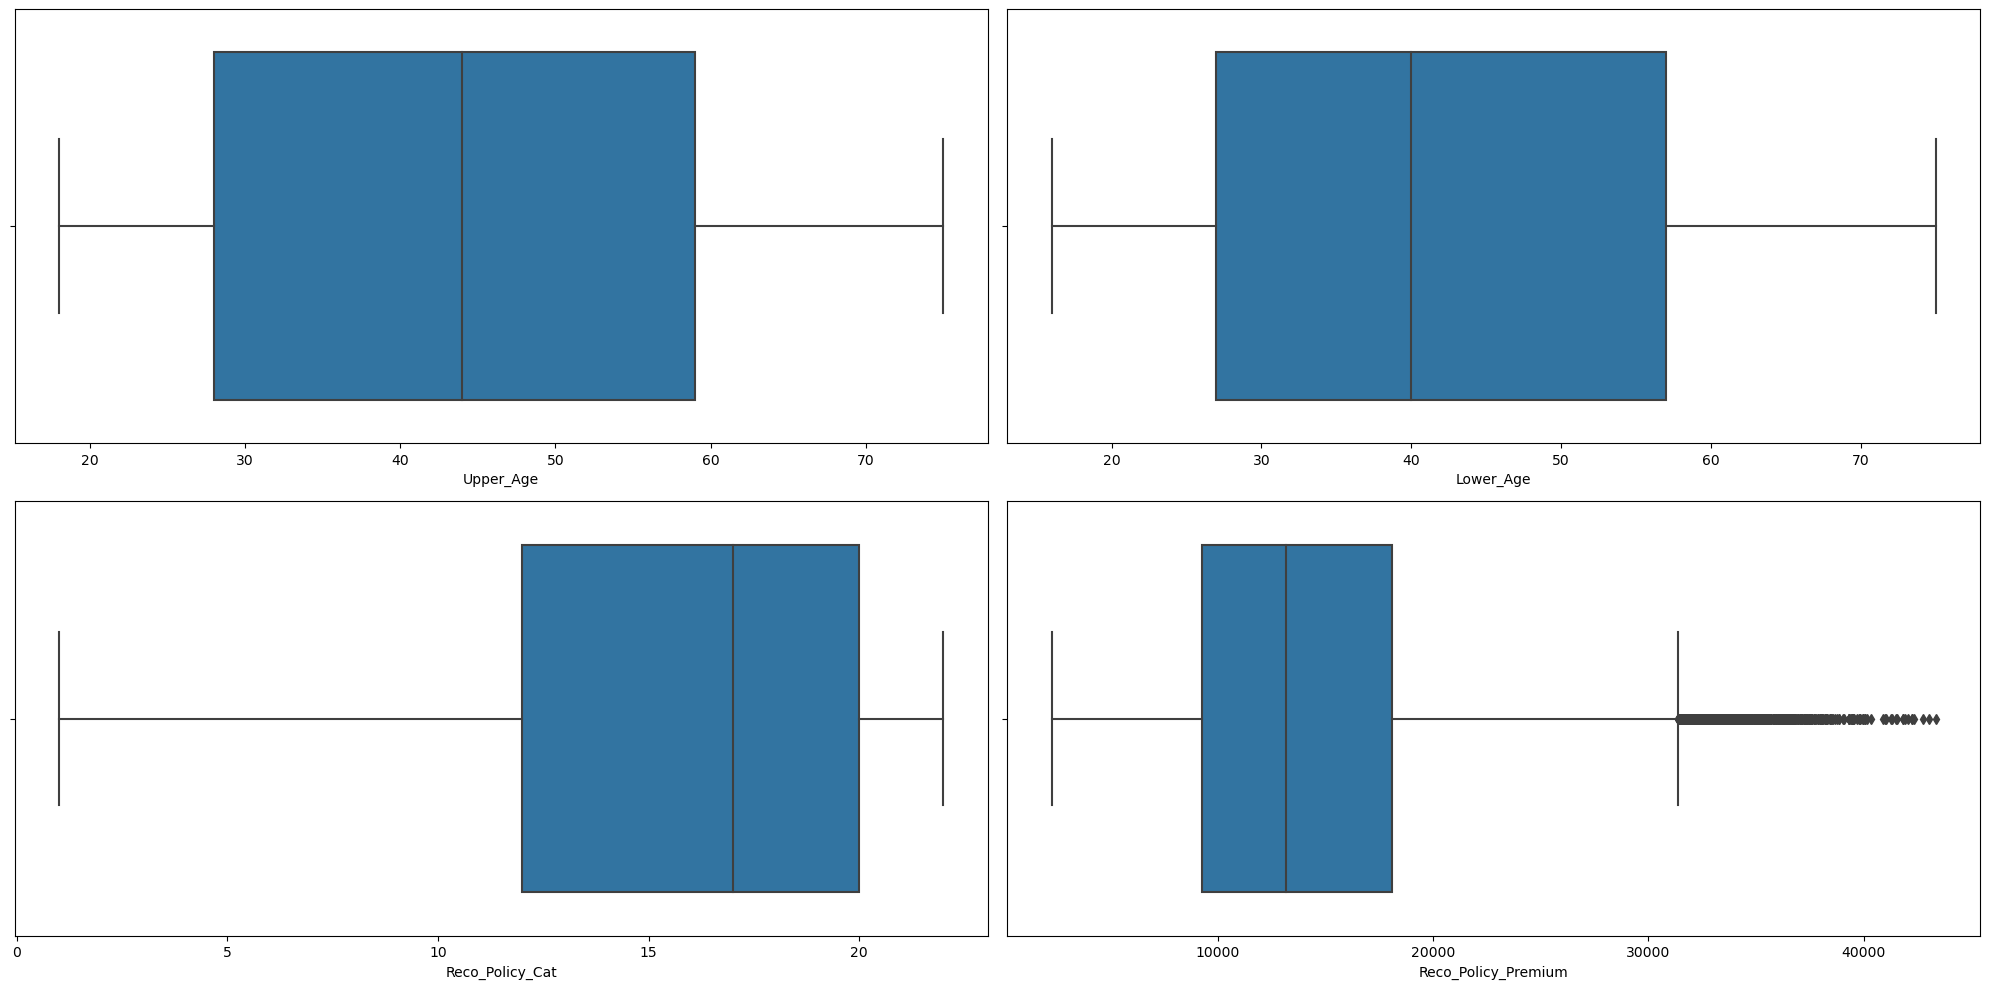

In [14]:
num_vars = ['Upper_Age', 'Lower_Age', 'Reco_Policy_Cat', 'Reco_Policy_Premium']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

## Data Preprocessing

In [15]:
# Check missing values
data.isnull().sum()

Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

* Health Indicator,Holding_Policy_Duration,Holding_Policy_Type have missing values.

In [16]:
# Drop null value each row that have null value
data = data.dropna(subset=['Health Indicator'])

In [17]:
data.drop(columns=['Holding_Policy_Duration', 'Holding_Policy_Type'], inplace=True)

In [18]:
data.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,22,11628.0,0
1,Owned,Joint,75,22,No,X2,22,30510.0,0
3,Owned,Joint,52,48,No,X1,19,17780.0,0
4,Rented,Individual,44,44,No,X2,16,10404.0,0
5,Rented,Individual,52,52,No,X2,22,15264.0,1


#### Label Encoding for each Object datatype

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [20]:
data['Accomodation_Type']=lb.fit_transform(data['Accomodation_Type'])

In [21]:
data['Reco_Insurance_Type']=lb.fit_transform(data['Reco_Insurance_Type'])

In [22]:
data['Is_Spouse']=lb.fit_transform(data['Is_Spouse'])

In [23]:
data['Health Indicator']=lb.fit_transform(data['Health Indicator'])

In [24]:
data.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,0,36,36,0,0,22,11628.0,0
1,0,1,75,22,0,1,22,30510.0,0
3,0,1,52,48,0,0,19,17780.0,0
4,1,0,44,44,0,1,16,10404.0,0
5,1,0,52,52,0,1,22,15264.0,1


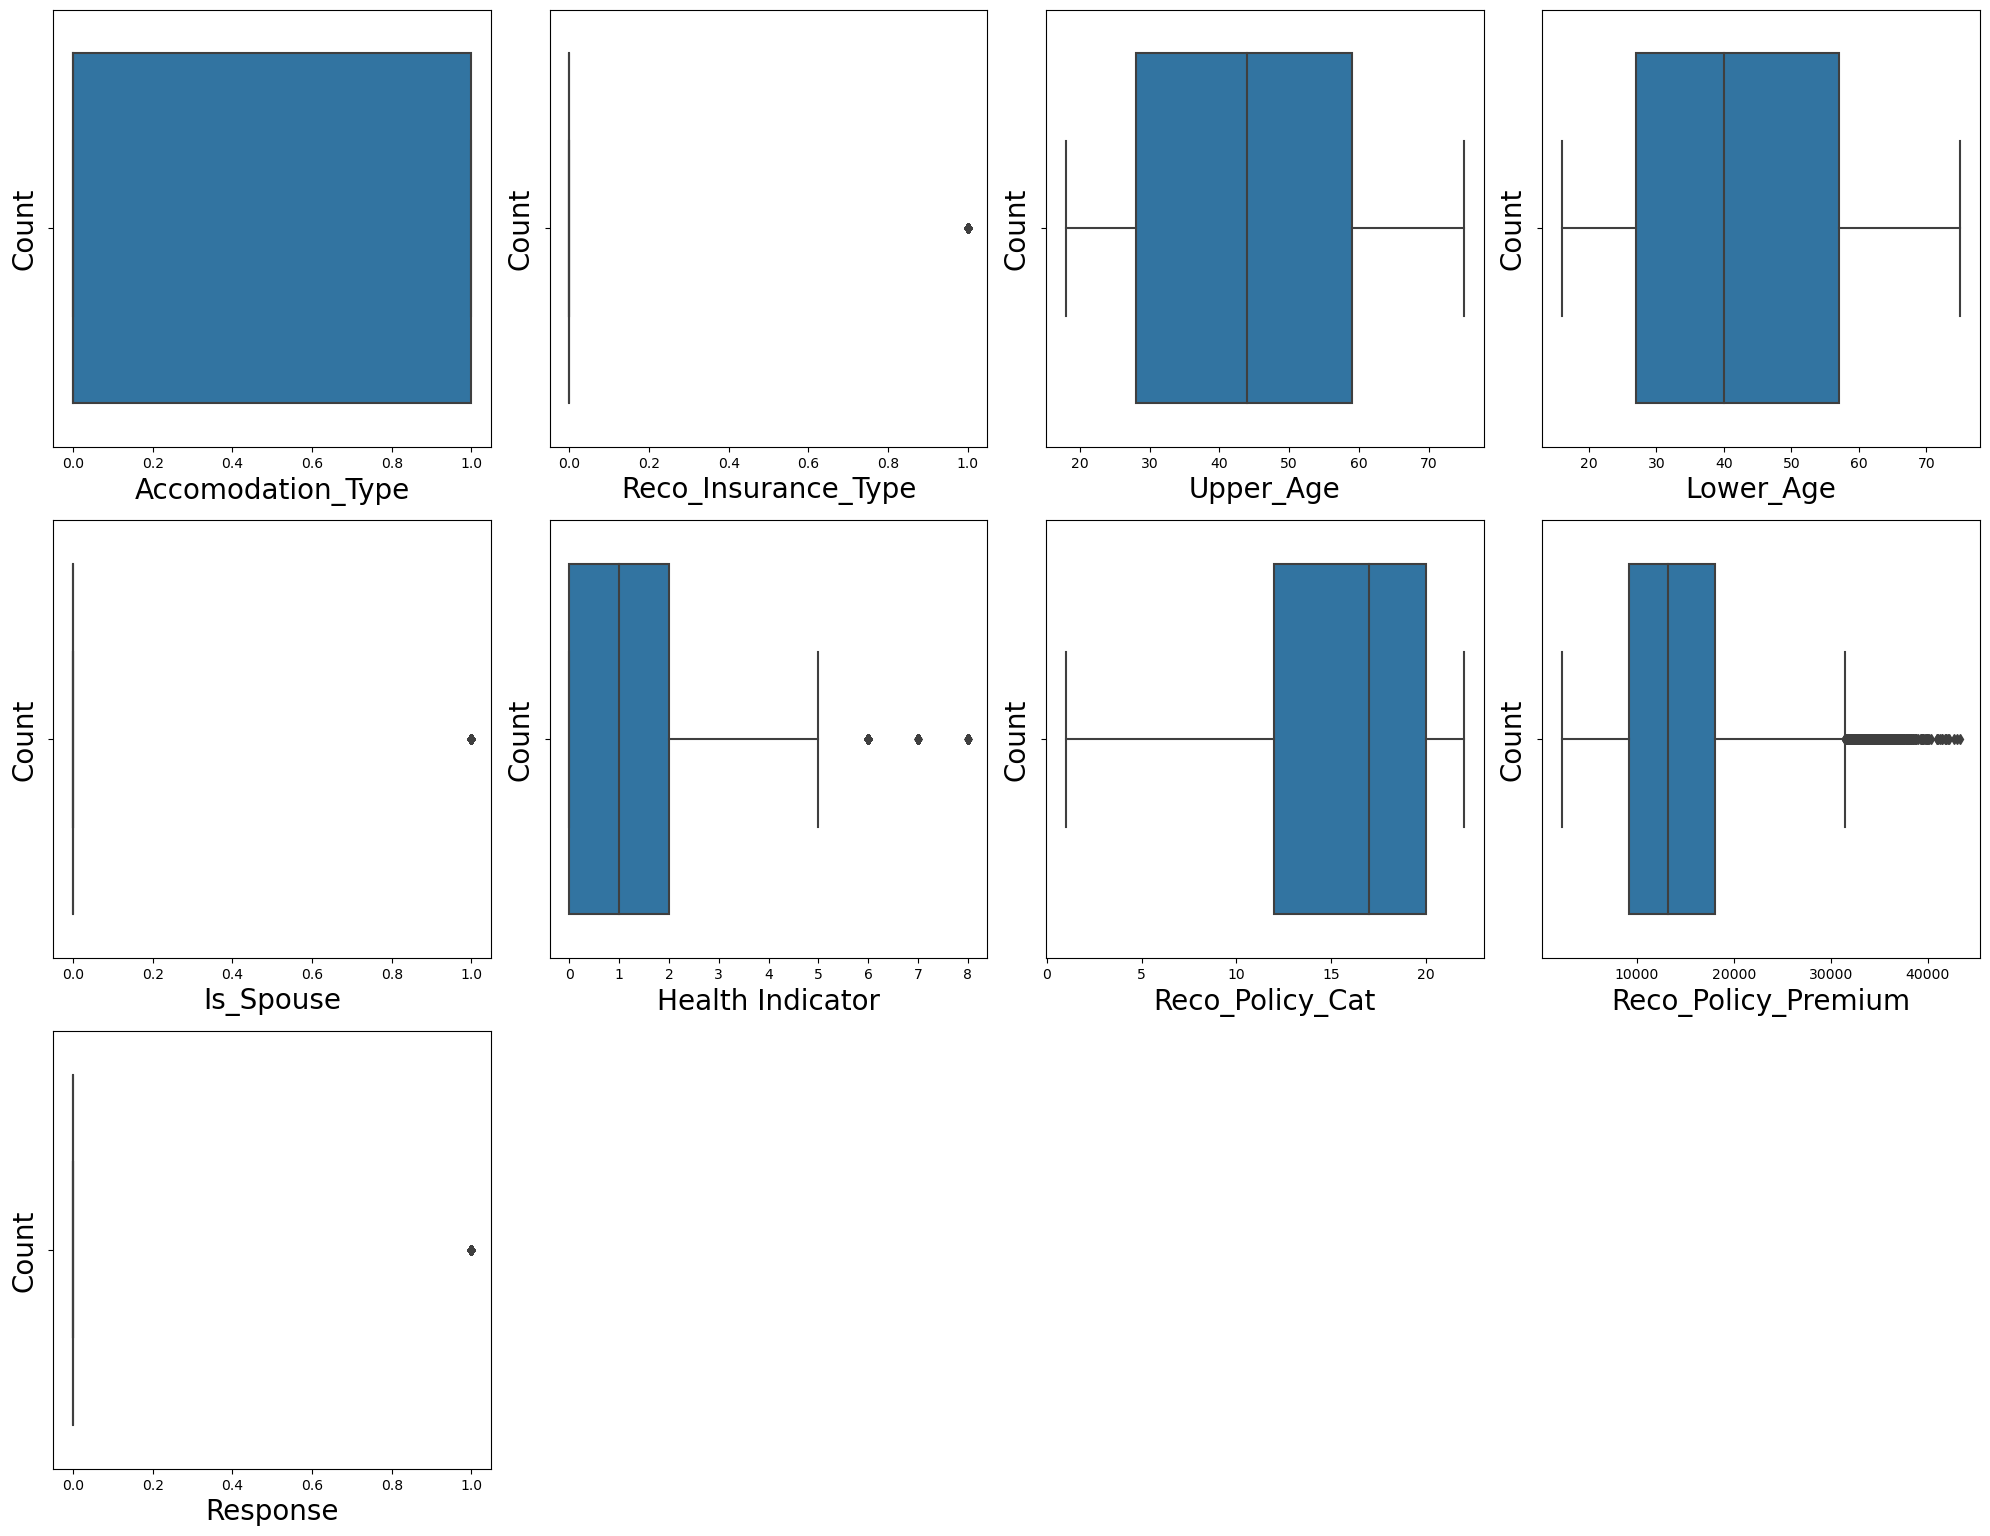

In [25]:
# Checking the outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Outliers found in Reco_Insurance_Type,Is_Spouse,Health Indicator,Reco_Policy_Premium,Response.

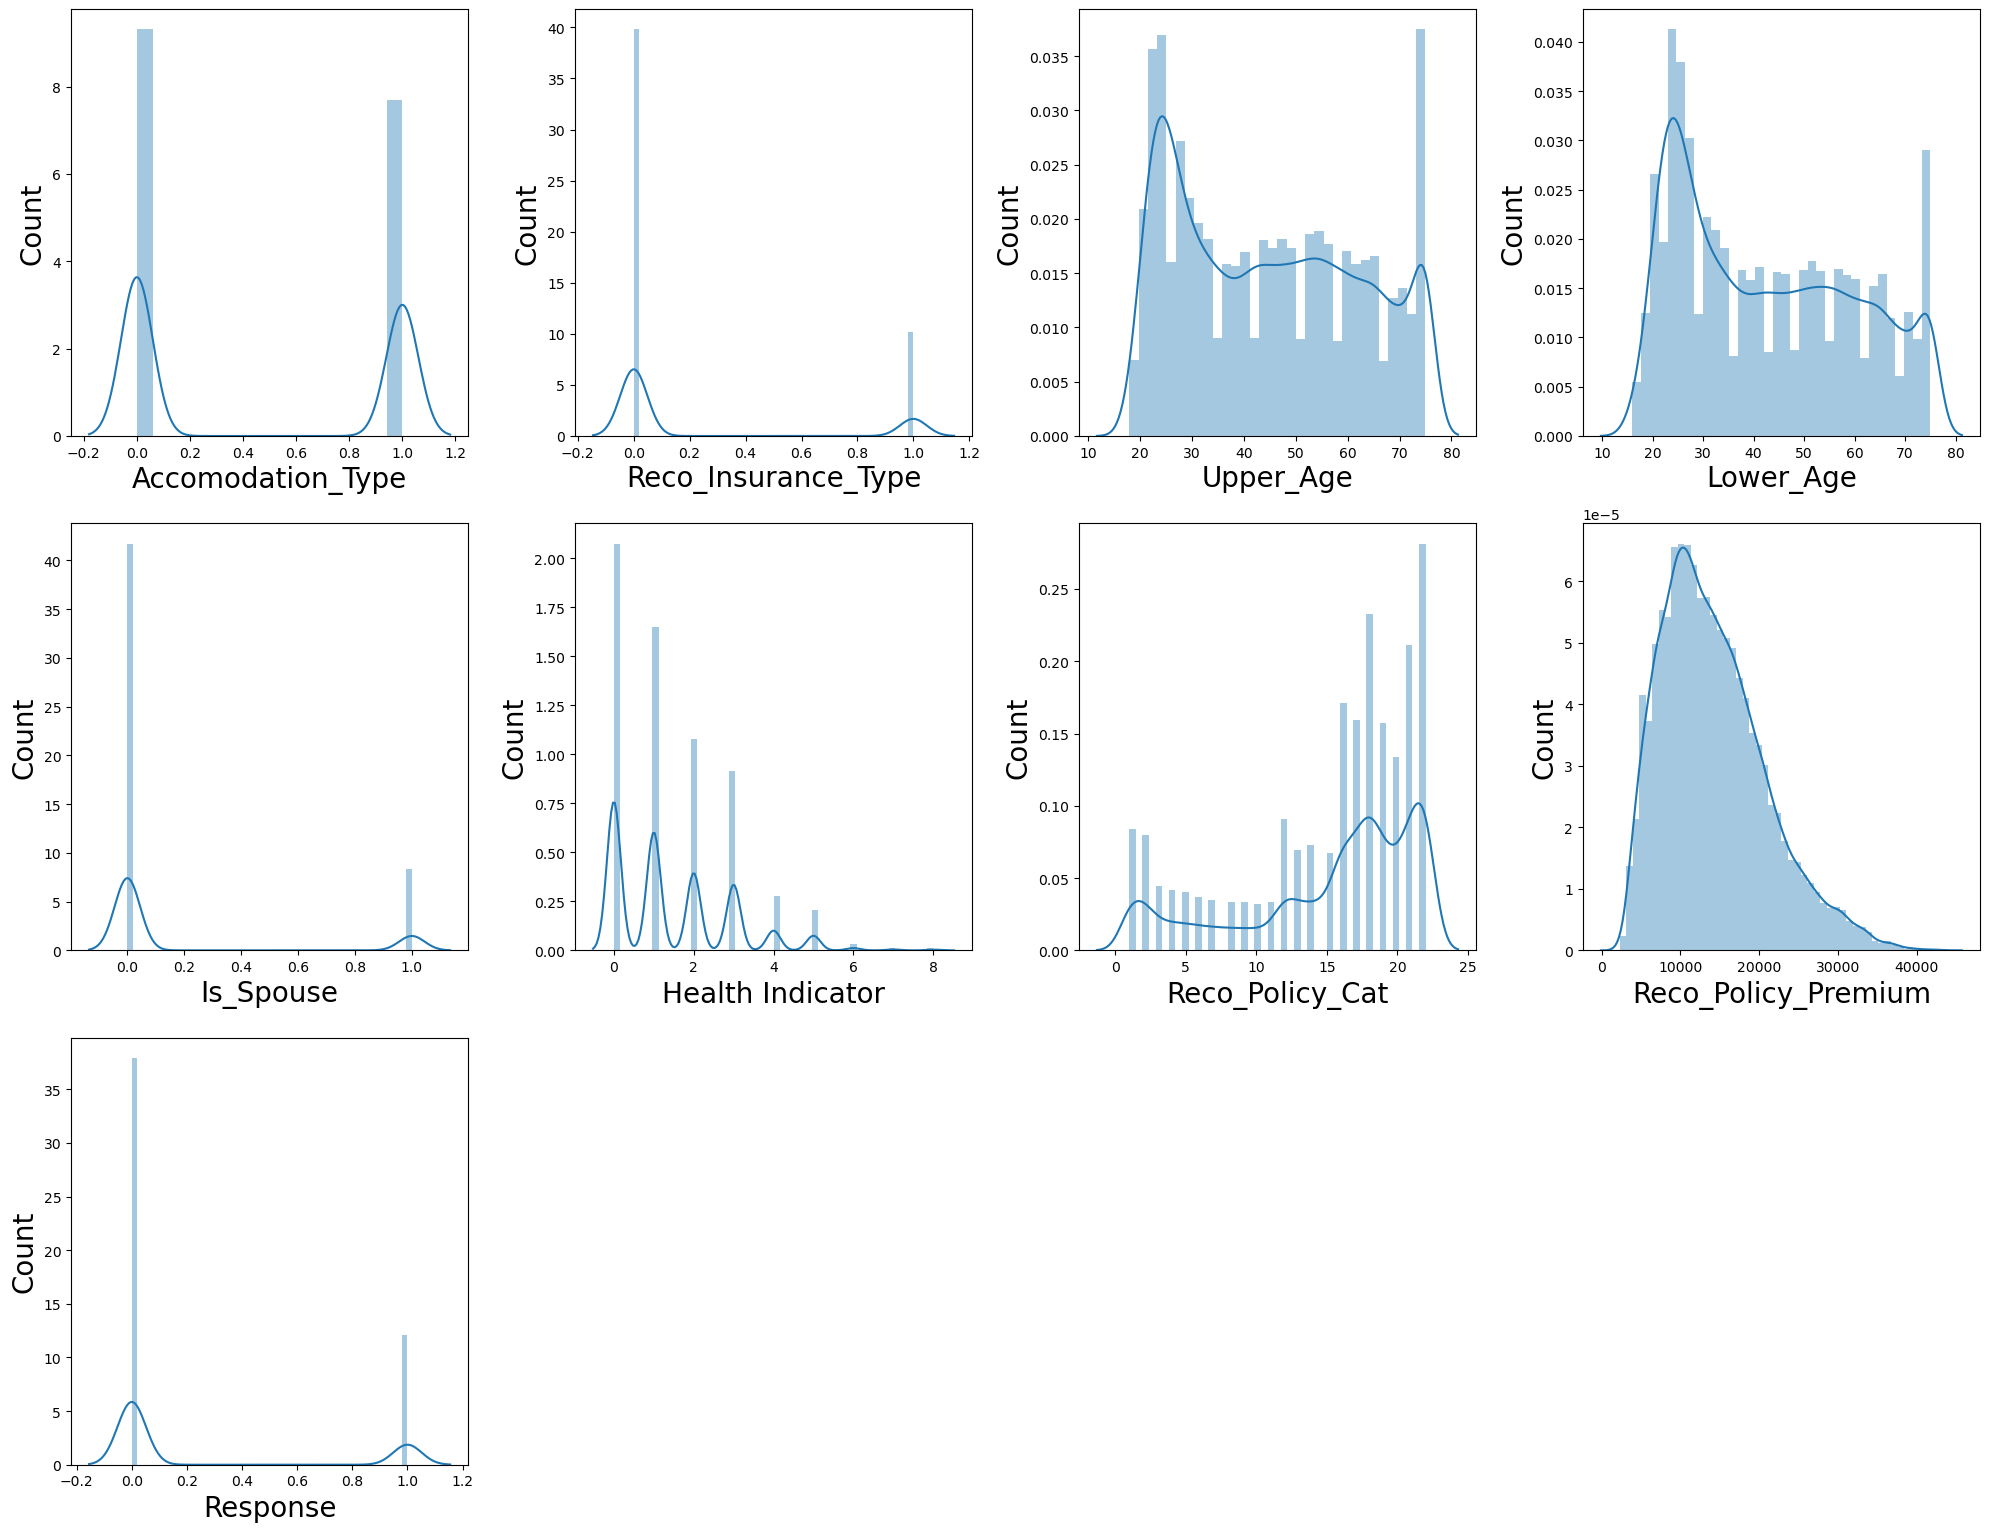

In [26]:
# Checking distribution plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Outliers found in Reco_Insurance_Type,Is_Spouse,Health Indicator,Reco_Policy_Premium,Response and all are normally distributed.

###### Handling outliers

In [27]:
# Removing outlier of Reco_Insurance_Type by STD
upper_limit = data['Reco_Insurance_Type'].mean()+3*data['Reco_Insurance_Type'].std()
upper_limit

1.4130887854072243

In [28]:
lower_limit = data['Reco_Insurance_Type'].mean()-3*data['Reco_Insurance_Type'].std()
lower_limit

-1.0049848840012894

In [29]:
len(data.loc[data['Reco_Insurance_Type']>upper_limit])

0

In [30]:
data.loc[data['Reco_Insurance_Type']>upper_limit,['Reco_Insurance_Type']]=data['Reco_Insurance_Type'].median()

In [31]:
data.loc[data['Reco_Insurance_Type']<lower_limit,['Reco_Insurance_Type']]=data['Reco_Insurance_Type'].median()

<AxesSubplot:xlabel='Reco_Insurance_Type'>

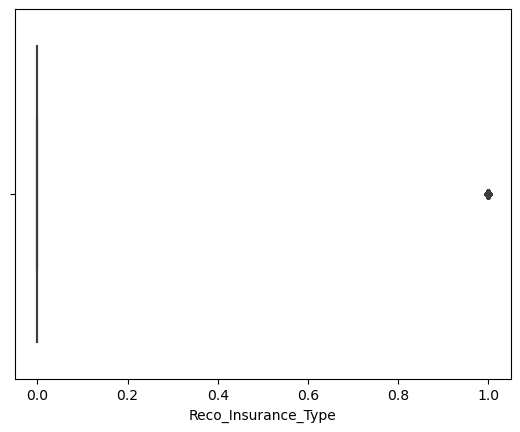

In [32]:
sns.boxplot(data['Reco_Insurance_Type'])

In [33]:
# Removing outlier of Is_Spouse by STD
upper_limit = data['Is_Spouse'].mean()+3*data['Is_Spouse'].std()
upper_limit

1.2822838540305022

In [34]:
lower_limit = data['Is_Spouse'].mean()-3*data['Is_Spouse'].std()
lower_limit

-0.9502688505858338

In [35]:
len(data.loc[data['Is_Spouse']>upper_limit])

0

In [36]:
data.loc[data['Is_Spouse']>upper_limit,['Is_Spouse']]=data['Is_Spouse'].median()

In [37]:
data.loc[data['Is_Spouse']<lower_limit,['Is_Spouse']]=data['Is_Spouse'].median()

<AxesSubplot:xlabel='Is_Spouse'>

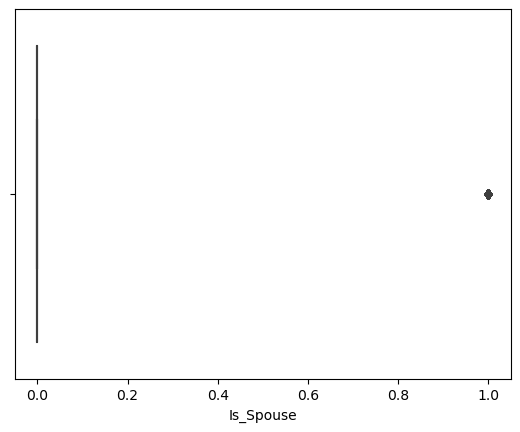

In [38]:
sns.boxplot(data['Is_Spouse'])

In [39]:
# Removing outlier of Health Indicator by STD
upper_limit = data['Health Indicator'].mean()+3*data['Health Indicator'].std()
upper_limit

5.779221744505374

In [40]:
lower_limit = data['Health Indicator'].mean()-3*data['Health Indicator'].std()
lower_limit

-2.8898338748414214

In [41]:
len(data.loc[data['Health Indicator']>upper_limit])

337

In [42]:
data.loc[data['Health Indicator']>upper_limit,['Health Indicator']]=data['Health Indicator'].median()

In [43]:
data.loc[data['Health Indicator']<lower_limit,['Health Indicator']]=data['Health Indicator'].median()

<AxesSubplot:xlabel='Health Indicator'>

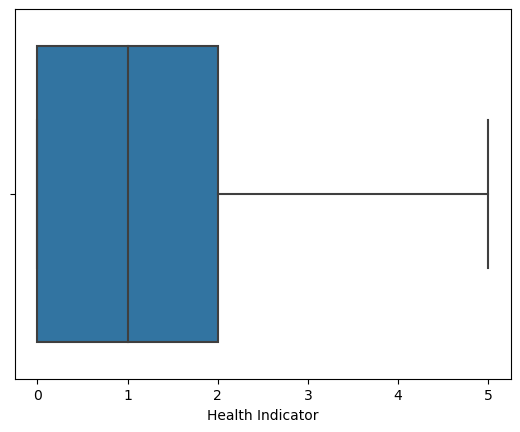

In [44]:
sns.boxplot(data['Health Indicator'])

In [45]:
# Removing outlier of Reco_Policy_Premium by STD
upper_limit = data['Reco_Policy_Premium'].mean()+3*data['Reco_Policy_Premium'].std()
upper_limit

34006.55431442139

In [46]:
lower_limit = data['Reco_Policy_Premium'].mean()-3*data['Reco_Policy_Premium'].std()
lower_limit

-5630.558009147177

In [47]:
len(data.loc[data['Reco_Policy_Premium']>upper_limit])

260

In [48]:
data.loc[data['Reco_Policy_Premium']>upper_limit,['Reco_Policy_Premium']]=data['Reco_Policy_Premium'].median()

In [49]:
data.loc[data['Reco_Policy_Premium']<lower_limit,['Reco_Policy_Premium']]=data['Reco_Policy_Premium'].median()

<AxesSubplot:xlabel='Reco_Policy_Premium'>

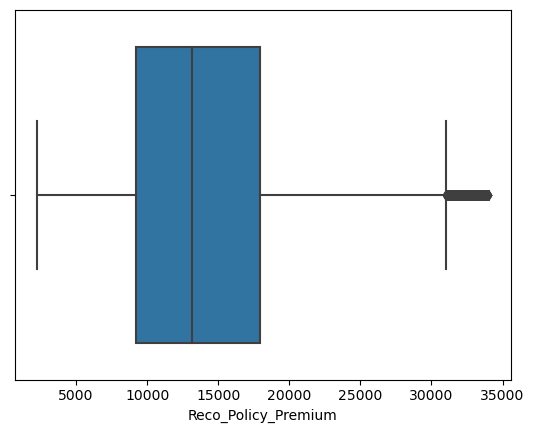

In [50]:
sns.boxplot(data['Reco_Policy_Premium'])

In [51]:
# Removing outlier of Reco_Policy_Premium by STD
upper_limit = data['Response'].mean()+3*data['Response'].std()
upper_limit

1.5259516516491798

In [52]:
lower_limit = data['Response'].mean()-3*data['Response'].std()
lower_limit

-1.042626398402261

In [53]:
len(data.loc[data['Response']>upper_limit])

0

In [54]:
data.loc[data['Response']>upper_limit,['Response']]=data['Response'].median()

In [55]:
data.loc[data['Response']<lower_limit,['Response']]=data['Response'].median()

<AxesSubplot:xlabel='Response'>

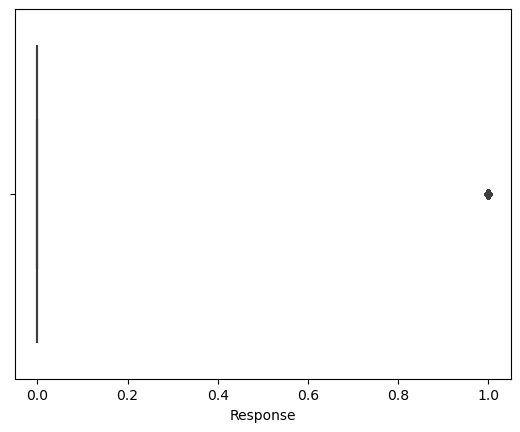

In [56]:
sns.boxplot(data['Response'])

## Feature Selection

In [57]:
# Check redundant feature
data.describe()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000
mean,0.452298,0.204052,44.815136,42.692251,0.166008,1.396494,15.137174,14033.619545,0.241663
std,0.497726,0.403012,17.317461,17.315502,0.372092,1.361126,6.338766,6348.988625,0.428096
min,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,1.000000,2280.000000,0.000000
25%,0.000000,0.000000,28.000000,27.000000,0.000000,0.000000,12.000000,9226.000000,0.000000
50%,0.000000,0.000000,44.000000,40.000000,0.000000,1.000000,17.000000,13178.000000,0.000000
75%,1.000000,0.000000,59.000000,57.000000,0.000000,2.000000,20.000000,17948.000000,0.000000
max,1.000000,1.000000,75.000000,75.000000,1.000000,5.000000,22.000000,33996.800000,1.000000


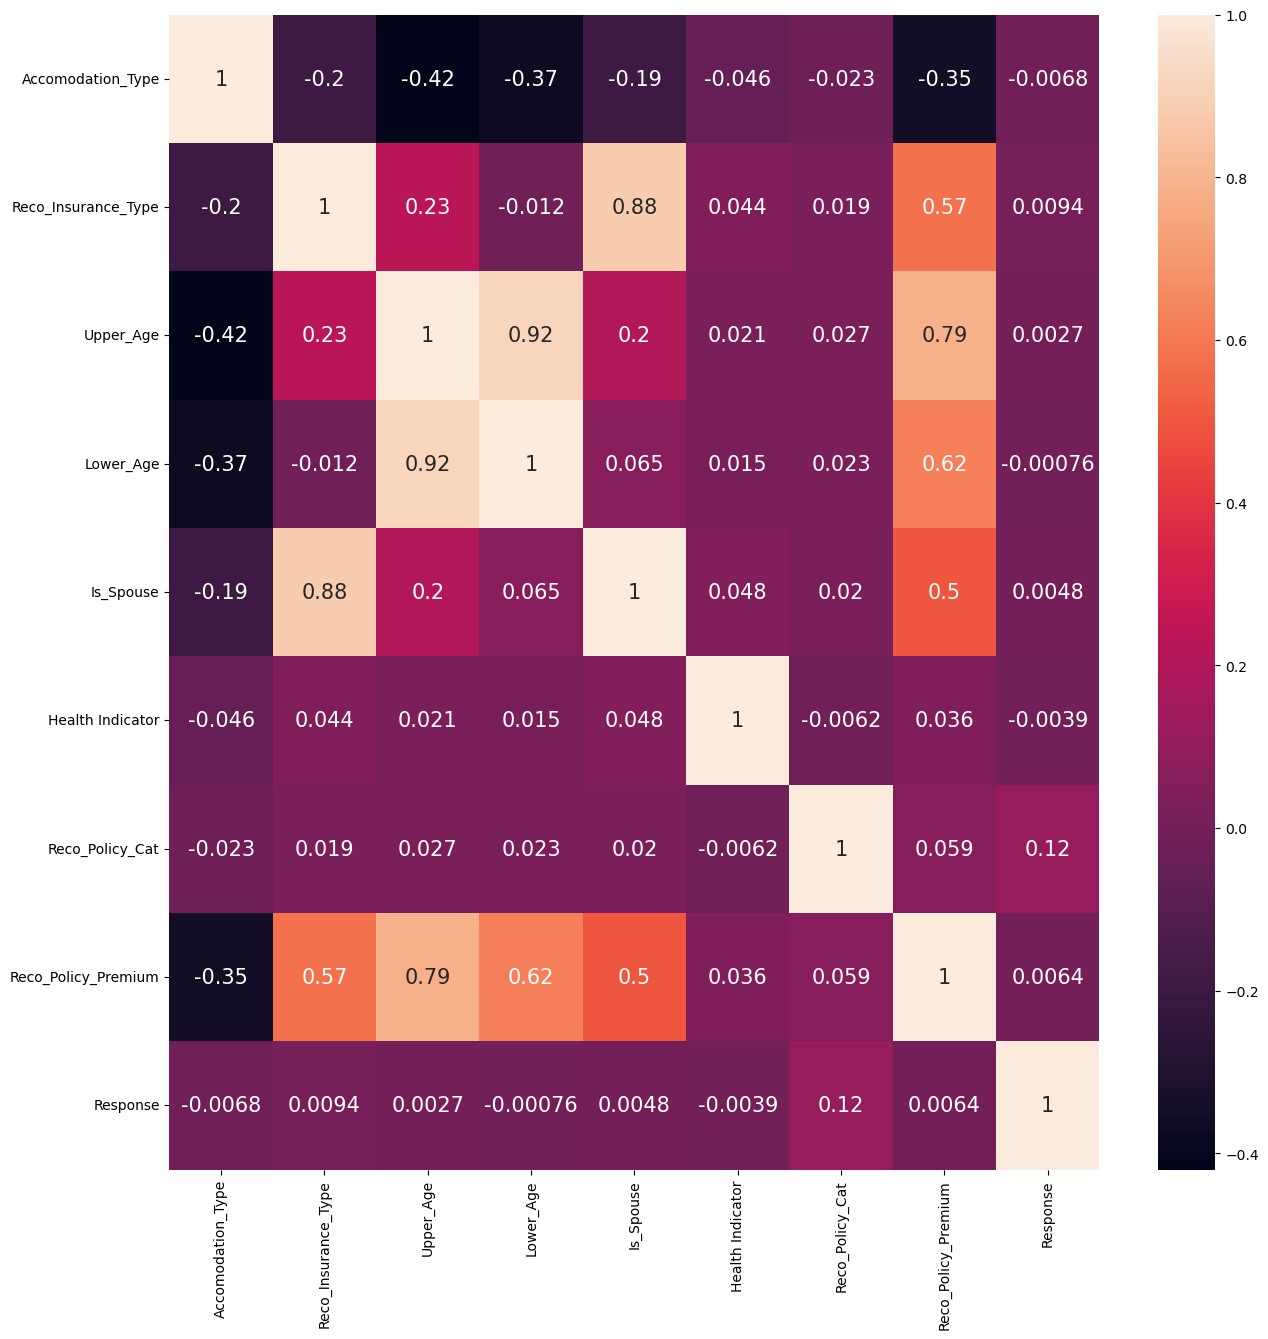

In [58]:
# Correlation Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':15})
plt.show()

## Model Creation

In [59]:
# creating dependent & independent variables
x = data.drop('Response',axis=1)
y = data.Response

In [60]:
# creating training testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [61]:
print('x train shape :',x_train.shape)
print('x test shape :',x_test.shape)
print('y train shape :',y_train.shape)
print('y test shape :',y_test.shape)

x train shape : (31352, 8)
x test shape : (7839, 8)
y train shape : (31352,)
y test shape : (7839,)


### Logistic Regression

In [62]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_lr_predict=lr.predict(x_test)

In [64]:
print("Accuracy Score:",accuracy_score(y_test,y_lr_predict))

Accuracy Score: 0.7514989156780202


In [65]:
print(classification_report(y_test,y_lr_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5891
           1       0.00      0.00      0.00      1948

    accuracy                           0.75      7839
   macro avg       0.38      0.50      0.43      7839
weighted avg       0.56      0.75      0.64      7839



### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
y_dt_predict=dt.predict(x_test)

In [68]:
print("Accuracy Score:",accuracy_score(y_test,y_dt_predict))

Accuracy Score: 0.6456180635285113


In [69]:
print(classification_report(y_test,y_dt_predict))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      5891
           1       0.30      0.32      0.31      1948

    accuracy                           0.65      7839
   macro avg       0.54      0.54      0.54      7839
weighted avg       0.65      0.65      0.65      7839



### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_rf_predict=rf.predict(x_test)

In [72]:
print("Accuracy Score:",accuracy_score(y_test,y_rf_predict))

Accuracy Score: 0.7136114300293405


In [73]:
print(classification_report(y_test,y_rf_predict))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      5891
           1       0.33      0.15      0.21      1948

    accuracy                           0.71      7839
   macro avg       0.55      0.52      0.52      7839
weighted avg       0.65      0.71      0.67      7839



### Bagging

In [74]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [75]:
y_bc_predict=bc.predict(x_test)

In [76]:
print("Accuracy Score:",accuracy_score(y_test,y_bc_predict))

Accuracy Score: 0.7116979206531445


In [77]:
print(classification_report(y_test,y_bc_predict))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      5891
           1       0.34      0.17      0.23      1948

    accuracy                           0.71      7839
   macro avg       0.55      0.53      0.52      7839
weighted avg       0.66      0.71      0.67      7839



### XGBoosting

In [78]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
y_xgb_predict=xgb.predict(x_test)

In [80]:
print(classification_report(y_test,y_xgb_predict))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      5891
           1       0.36      0.03      0.06      1948

    accuracy                           0.75      7839
   macro avg       0.56      0.51      0.46      7839
weighted avg       0.66      0.75      0.66      7839



### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [82]:
y_knn_predict=knn.predict(x_test)

In [83]:
print(classification_report(y_test,y_knn_predict))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      5891
           1       0.28      0.12      0.17      1948

    accuracy                           0.71      7839
   macro avg       0.52      0.51      0.49      7839
weighted avg       0.64      0.71      0.66      7839



In [84]:
data = [{'Model': 'Logestic Regression', 'Accuracy Score': accuracy_score(y_test,y_lr_predict)},
         {'Model': 'Decision Tree ', 'Accuracy Score': accuracy_score(y_test,y_dt_predict)},
         {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test,y_rf_predict)},
         {'Model': 'Bagging', 'Accuracy Score': accuracy_score(y_test,y_bc_predict)},
         {'Model': 'XGBoosting', 'Accuracy Score': accuracy_score(y_test,y_xgb_predict)},
       {'Model': 'KNN', 'Accuracy Score': accuracy_score(y_test,y_knn_predict)}]
  
df = pd.DataFrame.from_dict(data)
  
df

,Model,Accuracy Score
0,Logestic Regression,0.751499
1,Decision Tree,0.645618
2,Random Forest,0.713611
3,Bagging,0.711698
4,XGBoosting,0.745248
5,KNN,0.705064
